<a href="https://colab.research.google.com/github/pratheeshsailor/Porter-Neural-Networks-Regression/blob/main/Porter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#for reading and handling the data
import pandas as pd
import numpy as np
import os

#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#ann training
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError

from tensorflow.keras.metrics import mean_absolute_percentage_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:

import pandas as pd
df=pd.read_csv('porter.csv')
df.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:

df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [ ]:
print('NAN in total_onshift_partners :',(len(df['total_onshift_partners'])-df['total_onshift_partners'].isna().sum())/len(df['total_onshift_partners'])*100)
df.drop(['total_onshift_partners'],inplace=True,axis=1)
print('NAN in total_busy_partners :',(len(df['total_busy_partners'])-df['total_busy_partners'].isna().sum())/len(df['total_busy_partners'])*100)
df.drop(['total_busy_partners'],inplace=True,axis=1)
print('NAN in total_outstanding_orders :',(len(df['total_outstanding_orders'])-df['total_outstanding_orders'].isna().sum())/len(df['total_outstanding_orders'])*100)
df.drop(['total_outstanding_orders'],inplace=True,axis=1)
df.head()

NAN in total_onshift_partners : 91.7630731203274
NAN in total_busy_partners : 91.7630731203274
NAN in total_outstanding_orders : 91.7630731203274


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600


In [ ]:
df['store_primary_category'].value_counts()
df['store_primary_category'].fillna('Other',inplace=True)
df['market_id'].value_counts()
df['market_id'].fillna('0.0',inplace=True)
df['order_protocol'].value_counts()
df['order_protocol'].fillna('0.0',inplace=True)
df.dropna(subset=['actual_delivery_time'],inplace=True)
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   market_id               197421 non-null  object
 1   created_at              197421 non-null  object
 2   actual_delivery_time    197421 non-null  object
 3   store_id                197421 non-null  object
 4   store_primary_category  197421 non-null  object
 5   order_protocol          197421 non-null  object
 6   total_items             197421 non-null  int64 
 7   subtotal                197421 non-null  int64 
 8   num_distinct_items      197421 non-null  int64 
 9   min_item_price          197421 non-null  int64 
 10  max_item_price          197421 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 18.1+ MB


In [ ]:

#Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)
df[cat_col].nunique()

Categorical columns : ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol']
Numerical columns : ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']


market_id                      7
created_at                180981
actual_delivery_time      178110
store_id                    6743
store_primary_category        75
order_protocol                 8
dtype: int64

In [ ]:

df['actual_delivery_time']=df['actual_delivery_time'].astype('datetime64[ns]')
df['created_at']=df['created_at'].astype('datetime64[ns]')
df['Time_taken_for_delivery']= (df['actual_delivery_time']-df['created_at'])/pd.Timedelta('60s')
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

Dropping the Column that are no longer required

In [ ]:

df.drop(['created_at','actual_delivery_time','store_id'],axis=1,inplace=True)

In [ ]:
# Create new features based on domain knowledge or interaction between existing features
df['price_range'] = df['max_item_price'] - df['min_item_price']


In [ ]:

df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes

df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,Time_taken_for_delivery,hour,day,price_range
0,1.0,5,1.0,4,3441,4,557,1239,62.983333,22,4,682
1,2.0,48,2.0,1,1900,1,1400,1400,67.066667,21,1,0
2,3.0,0,1.0,1,1900,1,1900,1900,29.683333,20,3,0
3,3.0,0,1.0,6,6900,5,600,1800,51.250000,21,1,1200
4,3.0,0,1.0,3,3900,3,1100,1600,39.833333,2,6,500


<Axes: >

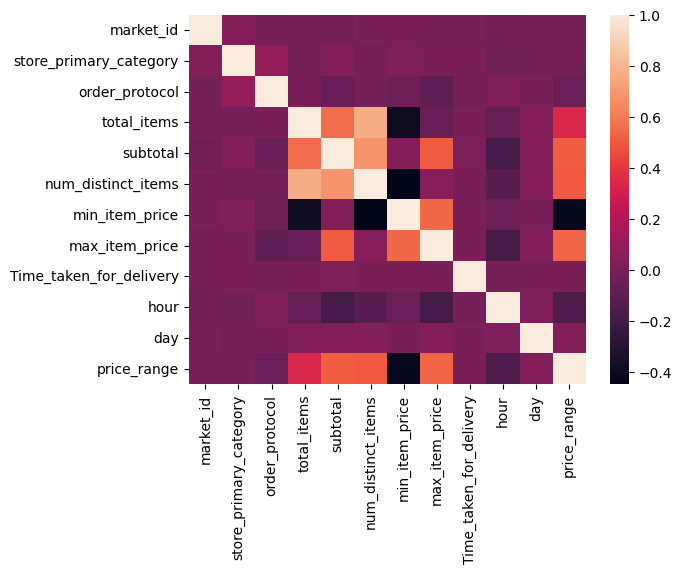

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Total Items by Market ID')

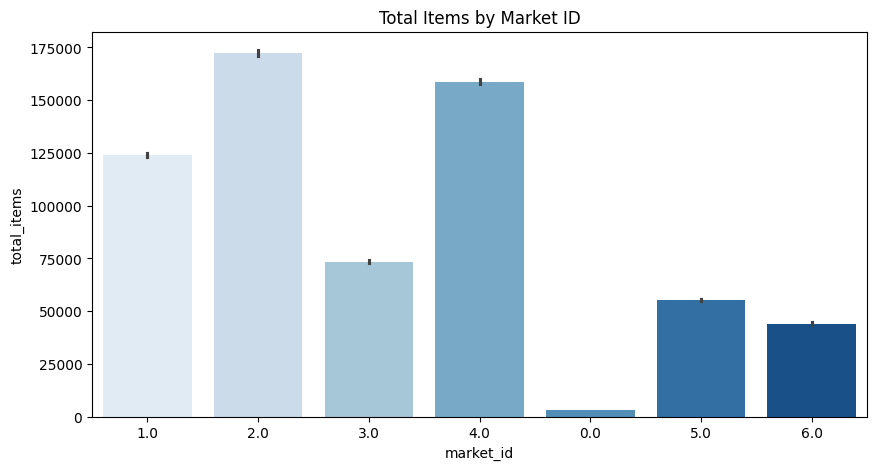

In [ ]:


plt.figure(figsize=(10, 5))  # Adjusted figure size for better visualization

# Subplot 1: Bar plot by market_id

sns.barplot(y='total_items', x='market_id', data=df, estimator='sum', palette='Blues')  # Adding palette parameter
plt.title('Total Items by Market ID')  # Adding title

# Subplot 2: Bar plot by store_primary_category



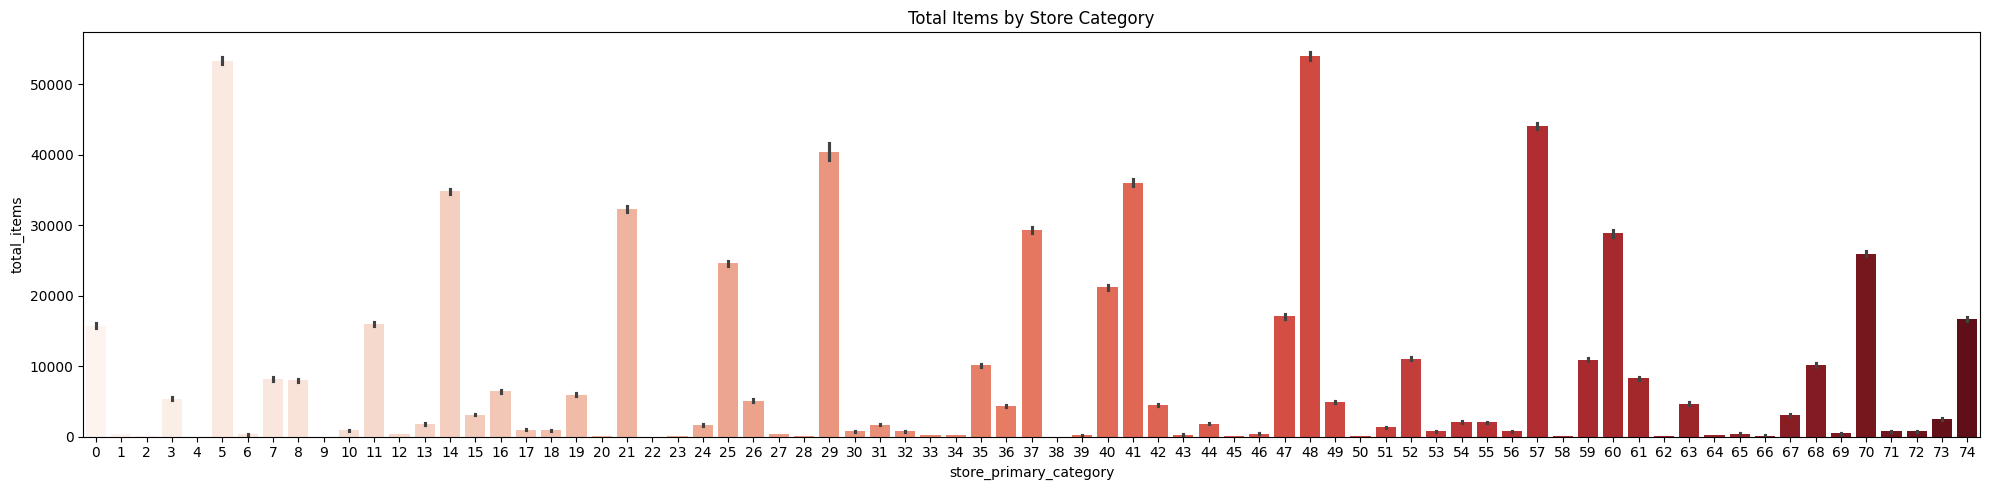

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(y='total_items', x='store_primary_category', data=df, estimator='sum', palette='Reds')  # Adding palette parameter
plt.title('Total Items by Store Category')  # Adding title

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

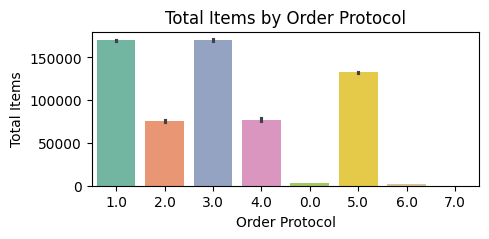

In [ ]:
plt.figure(figsize=(5, 2))

# Bar plot with different colors based on order_protocol
sns.barplot(y='total_items', x='order_protocol', data=df, estimator='sum', palette='Set2')

plt.title('Total Items by Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Total Items')

plt.show()

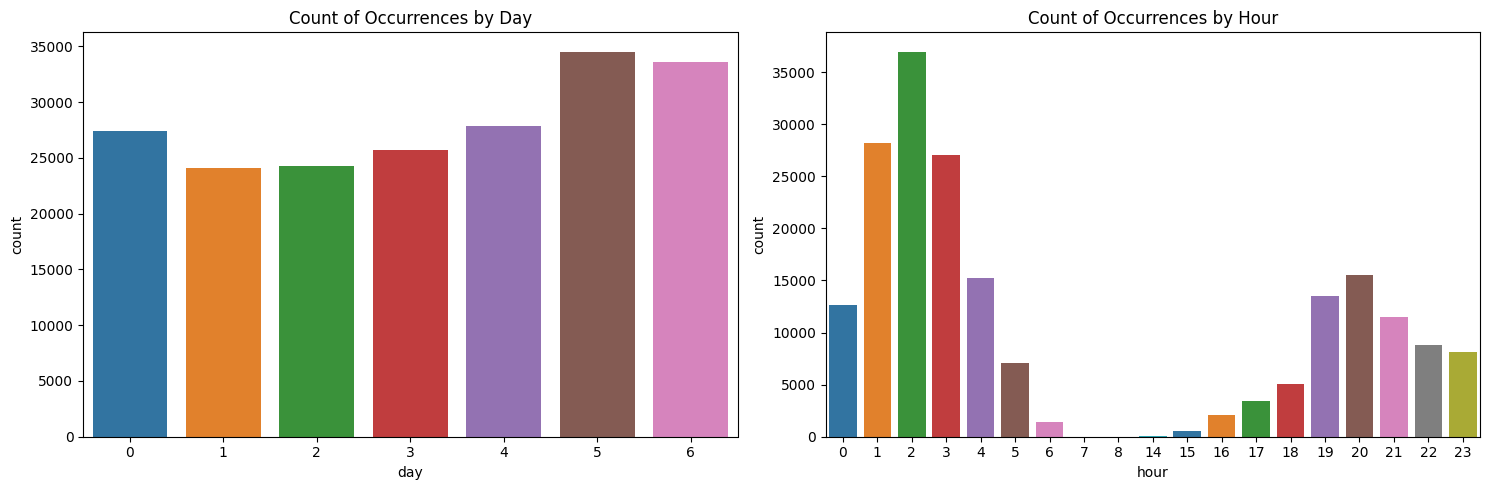

In [ ]:
# Set the color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

plt.figure(figsize=(15, 5))

# Plot for 'day'
plt.subplot(121)
sns.countplot(x=df['day'], palette=colors)
plt.title('Count of Occurrences by Day')

# Plot for 'hour'
plt.subplot(122)
sns.countplot(x=df['hour'], palette=colors)
plt.title('Count of Occurrences by Hour')

plt.tight_layout()
plt.show()

<Axes: xlabel='hour', ylabel='Time_taken_for_delivery'>

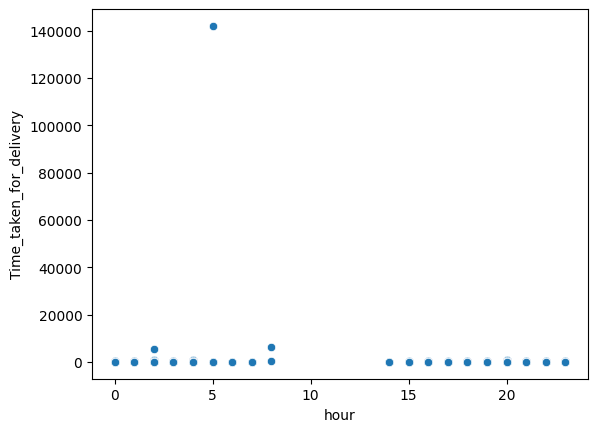

In [ ]:
sns.scatterplot(x='hour',y='Time_taken_for_delivery',data=df)

<Axes: xlabel='Time_taken_for_delivery', ylabel='subtotal'>

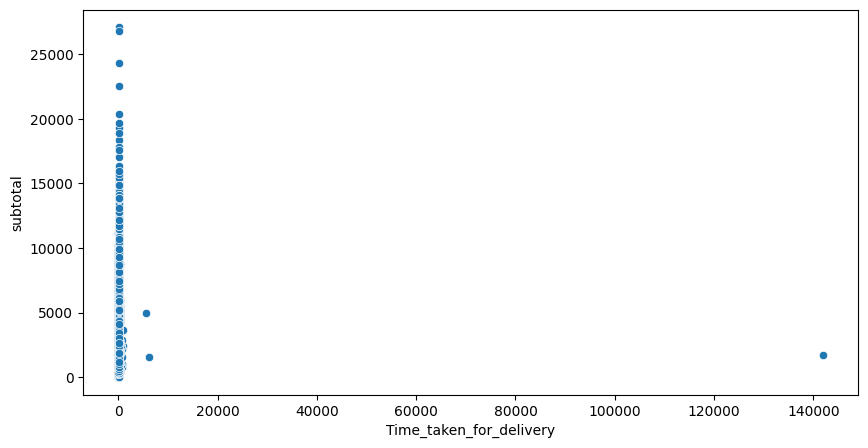

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Time_taken_for_delivery',y='subtotal',data=df)

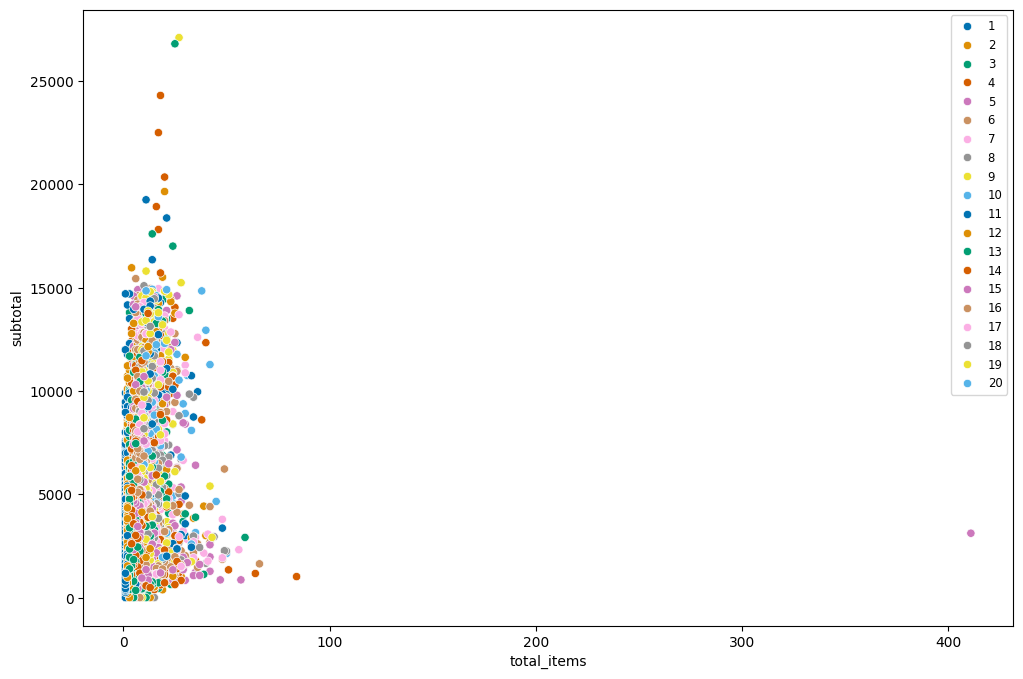

In [ ]:
# Create the scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as desired
sns.scatterplot(x='total_items', y='subtotal', hue='num_distinct_items', palette='colorblind', data=df)

# Move the legend to top-right corner with smaller size
plt.legend(loc='upper right', fontsize='small')

# Show the plot
plt.show()

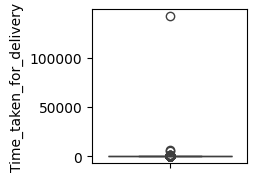

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()


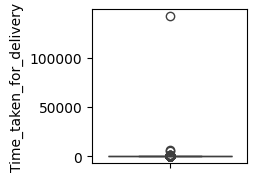

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()


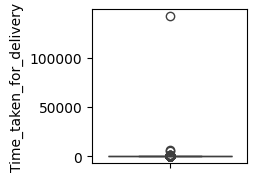

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
y=df['Time_taken_for_delivery']
x=df.drop(['Time_taken_for_delivery'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
prediction=regressor.predict(X_test)
mse=mean_squared_error(y_test,prediction)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,prediction)
print("mase : ",mae)
mape=np.mean(np.abs((y_test - prediction)/y_test))*100
print("mape : ",mape)

r2_score(y_test,prediction)

mse :  30925.047086851468
rmse :  175.85518783036076
mase :  14.134985005873023
mape :  31.67883227520833


-21.885312574788447

In [ ]:
#Scalling the data to feed before neural network

from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(11,kernel_initializer='normal',activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='Adam',metrics=['mse','mae'])
history=model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/10
247/247 [==============================] - 2s 5ms/step - loss: 160983.4062 - mse: 160983.4062 - mae: 29.7319 - val_loss: 429.5721 - val_mse: 429.5721 - val_mae: 14.7345
Epoch 2/10
247/247 [==============================] - 1s 4ms/step - loss: 160032.0156 - mse: 160032.0156 - mae: 15.7106 - val_loss: 403.2152 - val_mse: 403.2152 - val_mae: 14.2354
Epoch 3/10
247/247 [==============================] - 1s 5ms/step - loss: 160006.9688 - mse: 160006.9688 - mae: 15.3408 - val_loss: 387.6097 - val_mse: 387.6097 - val_mae: 13.8406
Epoch 4/10
247/247 [==============================] - 1s 6ms/step - loss: 159991.5156 - mse: 159991.5156 - mae: 15.1099 - val_loss: 377.4990 - val_mse: 377.4990 - val_mae: 13.6801
Epoch 5/10
247/247 [==============================] - 1s 6ms/step - loss: 159979.8438 - mse: 159979.8438 - mae: 14.9681 - val_loss: 373.0615 - val_mse: 373.0615 - val_mae: 13.5546
Epoch 6/10
247/247 [==============================] - 1s 6ms/step - loss: 159972.5781 - mse: 159972.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 32)                384       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1605 (6.27 KB)
Trainable params: 1605 (6.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


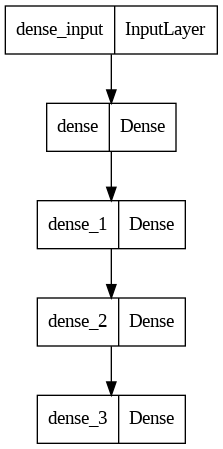

In [ ]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model)


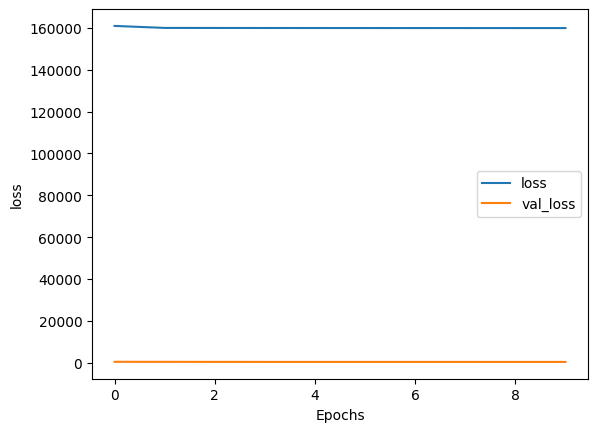

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
print('r2_score:',r2_score(y_test, model.predict(X_test)))
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, model.predict(X_test))
print("mae : ",mae)


1234/1234 [==============================] - 2s 1ms/step
r2_score: 0.006298296080809562
1234/1234 [==============================] - 2s 1ms/step
mse :  1342.7945055834384
rmse :  36.644160593243754
errors for neural net
1234/1234 [==============================] - 2s 1ms/step
mae :  13.427790685367635


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, model.predict(X_test))

1234/1234 [==============================] - 2s 2ms/step


0.30733321725780416